In [1]:
import sys
import os
sys.path.append(os.path.join('..','src'))
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from importlib import reload

import extra
import plotting
import sac_tri_envs
reload(extra)
reload(plotting)
reload(sac_tri_envs)
#general plot formatting
matplotlib.rcParams.update({'font.size': 14, "text.usetex": True,
                            'text.latex.preamble' : r'\usepackage{amsmath,amssymb,physics}'})

# Fig. 3

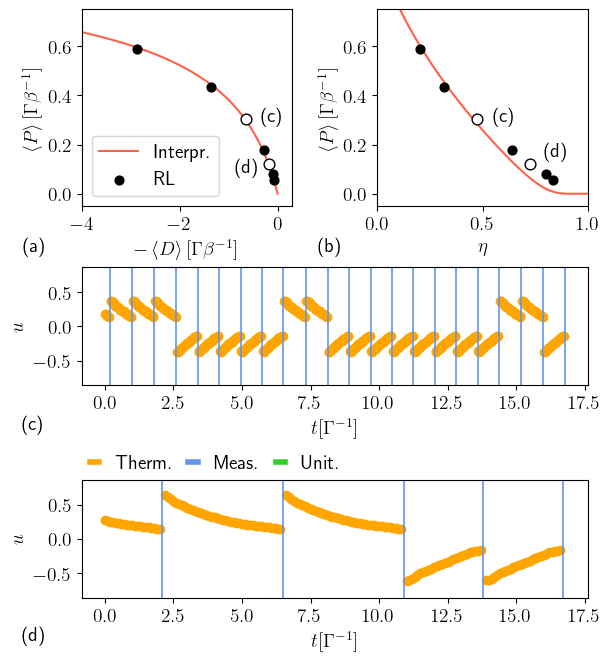

In [3]:
#info to input
main_dir = "../important_data/3_pareto_front_bosonic_feedback/data/pareto"
rl_pareto_file = os.path.join(main_dir, "det_pareto.txt")
ana_pareto_file = os.path.join(main_dir, "otto_pareto.txt")
cycle_0_folder = os.path.join(main_dir, "2022_07_06-16_46_30_a=0.8")
cycle_1_folder = os.path.join(main_dir, "2022_07_06-16_47_04_a=0.65") 
selected_cycle_cvals = [0.8,0.65]
actions_to_plot_0 = 14*40
plot_actions_to_file_line_0 = 23980
plot_actions_to_file_line_1 = 23671

#formatting details
cycle_0_file = os.path.join(cycle_0_folder, "saved_policies/det_policy.txt")
cycle_1_file = os.path.join(cycle_1_folder, "saved_policies/det_policy.txt")
actions_line_style = "scatter"
marker_size=40
actions_0_ylim = [-0.86, 0.86]
actions_1_ylim = [-0.86, 0.86]
diss_ylim = [-4, 0.3]
eta_lim = [0, 1]
pow_lim = [-0.05, 0.75]
prot_linewidth = 36
extra_cycles_linewidth = 1.5
custom_colors=["cornflowerblue","orange","limegreen"]
rl_legend_location = [0.72, 0.274]
rl_line_length = 1
rl_column_spacing=0.8
legend_column_spacing=0.8
action_legend_lines_1 = [Line2D([0], [0], color='orange', linewidth=4), 
                        Line2D([0], [0], color='cornflowerblue', linewidth=4),
                        Line2D([0], [0], color='limegreen', linewidth=4)]
action_legend_text_1 = ["Therm.","Meas.","Unit."]
action_legend_location_1 = [0., 1.]
legend_line_length_1 = 0.5
legend_line_length_0 = 2
vertical_line_indices = [0] #indices of discrete actions to be plotted as vertical lines

#font size
matplotlib.rcParams.update({'font.size': 14, "text.usetex": True,
                            'text.latex.preamble' : r'\usepackage{amsmath}\usepackage{physics}'})

#create the figure and subplots
fig = plt.figure(constrained_layout=True, figsize=(6,6.5))
gs = gridspec.GridSpec(3, 2, figure=fig, height_ratios = [2,1.2,1.2])
pareto_ax = fig.add_subplot(gs[0, 0])
pareto_2_ax = fig.add_subplot(gs[0, 1], sharey=pareto_ax)
prot_0_ax = fig.add_subplot(gs[1, :])
prot_1_ax = fig.add_subplot(gs[2, :], sharex=prot_0_ax)

#useful dicts to read data
quantity_ind = {'pow': 0, 'entropy': 1, 'eff':2, 'a': 3, 'h': 4}

#load pareto data
rl_data = np.loadtxt(rl_pareto_file)
ana_pareto_data = np.loadtxt(ana_pareto_file)
chosen_masks = np.full((4,) + rl_data[:,quantity_ind["a"]].shape, False)
not_chosen_mask = np.full( rl_data[:,quantity_ind["a"]].shape, False)
for i, cval in enumerate(selected_cycle_cvals):
    chosen_masks[i,:] = np.logical_or(chosen_masks[i,:], np.isclose(rl_data[:,quantity_ind["a"]], cval))
    not_chosen_mask = np.logical_or(not_chosen_mask,chosen_masks[i,:])
not_chosen_mask = np.logical_not(not_chosen_mask)

#load cycle duration data
dt_0 = float(extra.params_from_log_dir(cycle_0_folder)["dt"])
dt_1 = float(extra.params_from_log_dir(cycle_1_folder)["dt"])
actions_to_plot_1 = int(np.round(actions_to_plot_0*dt_0/dt_1))

#Pareto front (panel a)
pareto_ax.plot(ana_pareto_data[:,quantity_ind["entropy"]],
                  ana_pareto_data[:,quantity_ind["pow"]], label="Interpr.",c="tomato",zorder=-1)
pareto_ax.scatter(rl_data[not_chosen_mask,quantity_ind["entropy"]],rl_data[not_chosen_mask,quantity_ind["pow"]],
                  s=marker_size, marker="o", label="RL",c="black")
for i in range(len(selected_cycle_cvals)):
    pareto_ax.scatter(rl_data[chosen_masks[i,:],quantity_ind["entropy"]],rl_data[chosen_masks[i,:],quantity_ind["pow"]],
                      s=marker_size*1.5, marker="o", c="white",edgecolors='black')
pareto_ax.set_xlabel(r"$-\ev*{D}[\Gamma\beta^{-1}]$")
pareto_ax.set_ylabel(r"$\ev*{P}[\Gamma\beta^{-1}]$")
pareto_ax.set_xlim(diss_ylim)
pareto_ax.set_ylim(pow_lim)
pareto_ax.legend()

#Pareto front (panel b)
pareto_2_ax.plot(ana_pareto_data[:,quantity_ind["eff"]],ana_pareto_data[:,quantity_ind["pow"]],
                 label="Interpr.",c="tomato",zorder=-1)
pareto_2_ax.scatter(rl_data[not_chosen_mask,quantity_ind["eff"]],rl_data[not_chosen_mask,quantity_ind["pow"]],
                  s=marker_size, marker="o", label="RL",c="black")
for i in range(len(selected_cycle_cvals)):
    pareto_2_ax.scatter(rl_data[chosen_masks[i,:],quantity_ind["eff"]],rl_data[chosen_masks[i,:],quantity_ind["pow"]],
                      s=marker_size*1.5, marker="o", c="white",edgecolors='black')
pareto_2_ax.set_xlabel(r"$\eta$")
pareto_2_ax.set_ylabel(r"$\ev*{P}[\Gamma\beta^{-1}]$")
pareto_2_ax.set_xlim(eta_lim)

#first protocol (panel c)
plotting.plot_actions_on_axis(cycle_0_file, prot_0_ax, actions_to_plot=actions_to_plot_0,custom_colors=custom_colors,
                                is_tri=True, k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[\Gamma^{-1}]$", legend_column_spacing=legend_column_spacing,
                                hide_gray_vertical_line=True,legend_line_length=legend_line_length_0,
                                line_style=actions_line_style, dt=dt_0, actions_ylim=actions_0_ylim,
                                plot_to_file_line=plot_actions_to_file_line_0,vertical_line_indices=vertical_line_indices)

#second protocol (panel d)
plotting.plot_actions_on_axis(cycle_1_file, prot_1_ax, actions_to_plot=actions_to_plot_1,custom_colors=custom_colors,
                                is_tri=True, k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[\Gamma^{-1}]$", legend_lines=action_legend_lines_1,
                                legend_text=action_legend_text_1, legend_location=action_legend_location_1,
                                hide_gray_vertical_line=True,legend_line_length=legend_line_length_1,
                                line_style=actions_line_style, legend_column_spacing=legend_column_spacing, dt=dt_1,
                                 actions_ylim=actions_1_ylim,plot_to_file_line=plot_actions_to_file_line_1,
                                 vertical_line_indices=vertical_line_indices)

#panel numbering labels
fig.text(-0.28,-0.23, r"(a)",transform=pareto_ax.transAxes)
fig.text(-0.28,-0.23, r"(b)",transform=pareto_2_ax.transAxes)
fig.text(-0.118,-0.37, r"(c)",transform=prot_0_ax.transAxes)
fig.text(-0.118,-0.36, r"(d)",transform=prot_1_ax.transAxes)

#extra labels in panels (a) and (b)
fig.text(0.85 ,0.43, r"(c)",transform=pareto_ax.transAxes)
fig.text(0.73, 0.17, r"(d)",transform=pareto_ax.transAxes)
fig.text(0.55, 0.43, r"(c)",transform=pareto_2_ax.transAxes)
fig.text(0.79, 0.25, r"(d)",transform=pareto_2_ax.transAxes)


#save figure
plt.savefig("fig3.pdf")
#show
plt.show()

# Fig. 13

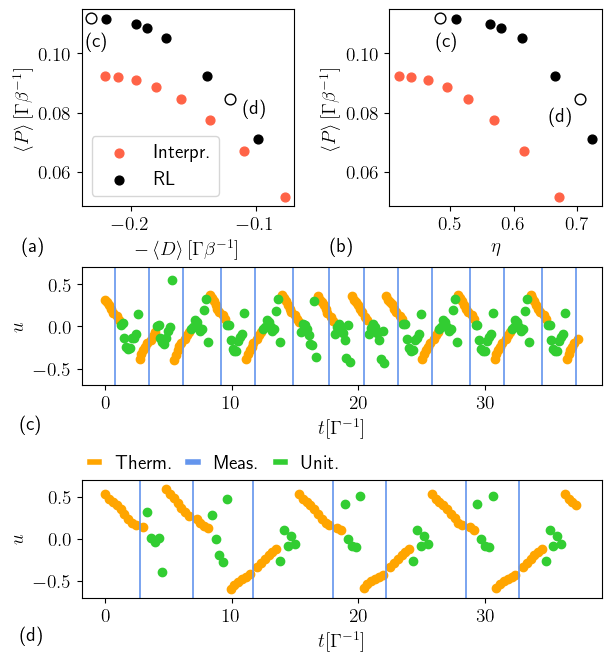

In [5]:
#info to input
main_dir = "../important_data/6_pareto_two_qubit_resonant/data/pareto"
rl_pareto_file = os.path.join(main_dir, "det_pareto.txt")
ana_pareto_file = os.path.join(main_dir, "analytic_pareto.txt")
cycle_0_folder = os.path.join(main_dir, "2023_03_17-16_33_04_a=1.0")
cycle_1_folder = os.path.join(main_dir, "2023_03_17-17_18_38_a=0.7") 
selected_cycle_cvals = [1.0,0.7]
actions_to_plot_0 = 250
plot_actions_to_file_line_0 = 23100
plot_actions_to_file_line_1 = None

#formatting details
cycle_0_file = os.path.join(cycle_0_folder, "saved_policies/det_policy.txt")
cycle_1_file = os.path.join(cycle_1_folder, "saved_policies/det_policy.txt")
actions_line_style = "scatter"
marker_size=40
actions_0_ylim = [-0.7, 0.7]
actions_1_ylim = [-0.7, 0.7]
diss_ylim = None
eta_lim = None
pow_lim = None
prot_linewidth = 36
extra_cycles_linewidth = 1.5
custom_colors=["cornflowerblue","orange","limegreen"]
rl_legend_location = [0.72, 0.274]
rl_line_length = 1
rl_column_spacing=0.8
legend_column_spacing=0.8
action_legend_lines_1 = [Line2D([0], [0], color='orange', linewidth=4), 
                        Line2D([0], [0], color='cornflowerblue', linewidth=4),
                        Line2D([0], [0], color='limegreen', linewidth=4)]
action_legend_text_1 = ["Therm.","Meas.","Unit."]
action_legend_location_1 = [0., 1.]
legend_line_length_1 = 0.5
legend_line_length_0 = 2
vertical_line_indices = [0] #indices of discrete actions to be plotted as vertical lines

#font size
matplotlib.rcParams.update({'font.size': 14, "text.usetex": True,
                            'text.latex.preamble' : r'\usepackage{amsmath}\usepackage{physics}'})

#create the figure and subplots
fig = plt.figure(constrained_layout=True, figsize=(6,6.5))
gs = gridspec.GridSpec(3, 2, figure=fig, height_ratios = [2,1.2,1.2])
pareto_ax = fig.add_subplot(gs[0, 0])
pareto_2_ax = fig.add_subplot(gs[0, 1], sharey=pareto_ax)
prot_0_ax = fig.add_subplot(gs[1, :])
prot_1_ax = fig.add_subplot(gs[2, :], sharex=prot_0_ax)

#useful dicts to read data
quantity_ind = {'pow': 0, 'entropy': 1, 'eff':2, 'a': 3, 'h': 4}

#load pareto data
rl_data = np.loadtxt(rl_pareto_file)
ana_pareto_data = np.loadtxt(ana_pareto_file)
chosen_masks = np.full((4,) + rl_data[:,quantity_ind["a"]].shape, False)
not_chosen_mask = np.full( rl_data[:,quantity_ind["a"]].shape, False)
for i, cval in enumerate(selected_cycle_cvals):
    chosen_masks[i,:] = np.logical_or(chosen_masks[i,:], np.isclose(rl_data[:,quantity_ind["a"]], cval))
    not_chosen_mask = np.logical_or(not_chosen_mask,chosen_masks[i,:])
not_chosen_mask = np.logical_not(not_chosen_mask)

#load cycle duration data
dt_0 = float(extra.params_from_log_dir(cycle_0_folder)["dt"])
dt_1 = float(extra.params_from_log_dir(cycle_1_folder)["dt"])
actions_to_plot_1 = int(np.round(actions_to_plot_0*dt_0/dt_1))

#Pareto front (panel a)
pareto_ax.scatter(ana_pareto_data[:,quantity_ind["entropy"]], ana_pareto_data[:,quantity_ind["pow"]],
                  s=marker_size, marker="o",label="Interpr.",c="tomato",zorder=-1)
pareto_ax.scatter(rl_data[not_chosen_mask,quantity_ind["entropy"]],rl_data[not_chosen_mask,quantity_ind["pow"]],
                  s=marker_size, marker="o", label="RL",c="black")
for i in range(len(selected_cycle_cvals)):
    pareto_ax.scatter(rl_data[chosen_masks[i,:],quantity_ind["entropy"]],rl_data[chosen_masks[i,:],quantity_ind["pow"]],
                      s=marker_size*1.5, marker="o", c="white",edgecolors='black')
pareto_ax.set_xlabel(r"$-\ev*{D}[\Gamma\beta^{-1}]$")
pareto_ax.set_ylabel(r"$\ev*{P}[\Gamma\beta^{-1}]$")
pareto_ax.set_xlim(diss_ylim)
pareto_ax.set_ylim(pow_lim)
pareto_ax.legend()

#Pareto front (panel b)
pareto_2_ax.scatter(ana_pareto_data[:,quantity_ind["eff"]],ana_pareto_data[:,quantity_ind["pow"]],
                 s=marker_size, marker="o", label="Interpr.",c="tomato",zorder=-1)
pareto_2_ax.scatter(rl_data[not_chosen_mask,quantity_ind["eff"]],rl_data[not_chosen_mask,quantity_ind["pow"]],
                  s=marker_size, marker="o", label="RL",c="black")
for i in range(len(selected_cycle_cvals)):
    pareto_2_ax.scatter(rl_data[chosen_masks[i,:],quantity_ind["eff"]],rl_data[chosen_masks[i,:],quantity_ind["pow"]],
                      s=marker_size*1.5, marker="o", c="white",edgecolors='black')
pareto_2_ax.set_xlabel(r"$\eta$")
pareto_2_ax.set_ylabel(r"$\ev*{P}[\Gamma\beta^{-1}]$")
pareto_2_ax.set_xlim(eta_lim)

#first protocol (panel c)
plotting.plot_actions_on_axis(cycle_0_file, prot_0_ax, actions_to_plot=actions_to_plot_0,custom_colors=custom_colors,
                                is_tri=True, k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[\Gamma^{-1}]$", legend_column_spacing=legend_column_spacing,
                                hide_gray_vertical_line=True,legend_line_length=legend_line_length_0,
                                line_style=actions_line_style, dt=dt_0, actions_ylim=actions_0_ylim,
                                plot_to_file_line=plot_actions_to_file_line_0,vertical_line_indices=vertical_line_indices)

#second protocol (panel d)
plotting.plot_actions_on_axis(cycle_1_file, prot_1_ax, actions_to_plot=actions_to_plot_1,custom_colors=custom_colors,
                                is_tri=True, k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[\Gamma^{-1}]$", legend_lines=action_legend_lines_1,
                                legend_text=action_legend_text_1, legend_location=action_legend_location_1,
                                hide_gray_vertical_line=True,legend_line_length=legend_line_length_1,
                                line_style=actions_line_style, legend_column_spacing=legend_column_spacing, dt=dt_1,
                                 actions_ylim=actions_1_ylim,plot_to_file_line=plot_actions_to_file_line_1,
                                 vertical_line_indices=vertical_line_indices)

#panel numbering labels
fig.text(-0.28,-0.23, r"(a)",transform=pareto_ax.transAxes)
fig.text(-0.28,-0.23, r"(b)",transform=pareto_2_ax.transAxes)
fig.text(-0.118,-0.37, r"(c)",transform=prot_0_ax.transAxes)
fig.text(-0.118,-0.36, r"(d)",transform=prot_1_ax.transAxes)

#extra labels in panels (a) and (b)
fig.text(0.02 ,0.81, r"(c)",transform=pareto_ax.transAxes)
fig.text(0.76, 0.47, r"(d)",transform=pareto_ax.transAxes)
fig.text(0.22, 0.81, r"(c)",transform=pareto_2_ax.transAxes)
fig.text(0.75, 0.43, r"(d)",transform=pareto_2_ax.transAxes)


#save figure
plt.savefig("fig13.pdf")
#show
plt.show()

# Fig. 14

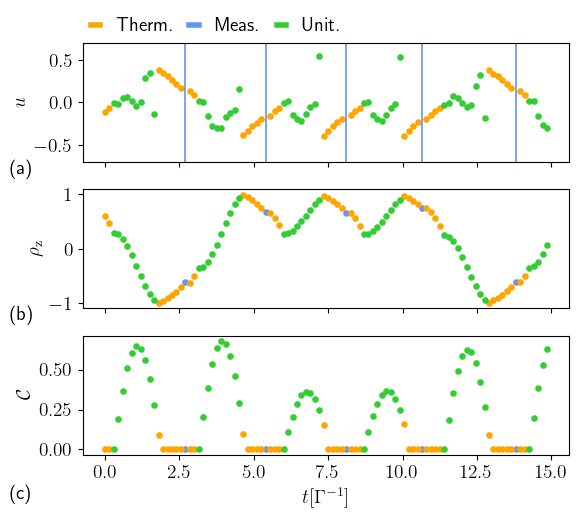

In [2]:
reload(plotting);

#info to input
counter = False
max_pow = True

#load the proper folders and cycles
if counter:
    main_dir = "../important_data/7_pareto_two_qubit_resonant_counterrot/data/pareto"
    if max_pow:
        cycle_folder = os.path.join(main_dir, "2023_03_22-14_53_40_a=1.0_dt=0.15")
    else:
        cycle_folder = os.path.join(main_dir, "2023_03_23-12_20_21_a=0.7_dt=0.3") 
#not counter rotating
else:
    main_dir = "../important_data/6_pareto_two_qubit_resonant/data/pareto"
    if max_pow:
        cycle_folder = os.path.join(main_dir, "2023_03_17-16_33_04_a=1.0")
    else:
        cycle_folder = os.path.join(main_dir, "2023_03_17-17_18_38_a=0.7") 

#extra formatting
actions_to_plot = 100
plot_to_file_line = None

#formatting details
cycle_file = os.path.join(cycle_folder, "saved_policies/det_policy.txt")
states_file = os.path.join(cycle_folder, "saved_policies/states.txt")
actions_line_style = "scatter"
actions_ylim = [-0.7, 0.7]
marker_size = 14
custom_colors=["cornflowerblue","orange","limegreen"]
action_legend_lines = [Line2D([0], [0], color='orange', linewidth=4), 
                        Line2D([0], [0], color='cornflowerblue', linewidth=4),
                        Line2D([0], [0], color='limegreen', linewidth=4)]
action_legend_text = ["Therm.","Meas.","Unit."]
action_legend_location = [0., 1.]
legend_line_length = 0.5
legend_column_spacing=0.8
vertical_line_indices = [0] #indices of discrete actions to be plotted as vertical lines

#font size
matplotlib.rcParams.update({'font.size': 14, "text.usetex": True,
                            'text.latex.preamble' : r'\usepackage{amsmath}\usepackage{physics}'})

#create the figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(6, 5.4), sharex=True)


#load cycle duration data
dt = float(extra.params_from_log_dir(cycle_folder)["dt"])

#plot the protocol
plotting.plot_actions_on_axis(cycle_file, axes[0], actions_to_plot=actions_to_plot,custom_colors=custom_colors,
                                is_tri=True, k_notation=False, x_count_from_zero=True, linewidth = marker_size,
                                xlabel="$t[\Gamma^{-1}]$", hide_gray_vertical_line=True, line_style=actions_line_style,
                                dt=dt, actions_ylim=actions_ylim, plot_to_file_line=plot_to_file_line,
                                hide_xaxis_label=True, legend_lines=action_legend_lines,
                                vertical_line_indices=vertical_line_indices,
                                legend_text=action_legend_text, legend_location=action_legend_location,
                                legend_line_length=legend_line_length, legend_column_spacing=legend_column_spacing)

#plot the state
plotting.plot_bloch_component_on_axis(cycle_folder, states_file, cycle_file, 2, axes[1], values_to_plot=actions_to_plot, 
                                k_notation=False, x_count_from_zero=True, xlabel="$t[\Gamma^{-1}]$", dt=dt, ylim=None,
                                plot_to_file_line=plot_to_file_line, ylabel=r"$\rho_{\rm z}$", hide_xaxis_label=True,
                                     custom_colors=custom_colors,marker_size=marker_size)
#plot the concurrence
plotting.plot_concurrence_on_axis(cycle_folder, states_file, cycle_file, axes[2], values_to_plot=actions_to_plot, 
                                k_notation=False, x_count_from_zero=True, xlabel="$t[\Gamma^{-1}]$", dt=dt, ylim=None,
                                plot_to_file_line=plot_to_file_line,custom_colors=custom_colors,marker_size=marker_size)


#panel numbering labels
fig.text(-0.15,-0.1, r"(a)",transform=axes[0].transAxes)
fig.text(-0.15,-0.1, r"(b)",transform=axes[1].transAxes)
fig.text(-0.15,-0.37, r"(c)",transform=axes[2].transAxes)

#tight layout
plt.tight_layout()

#save figure
plt.savefig("fig14.pdf")
#show
plt.show()

# Fig. 15

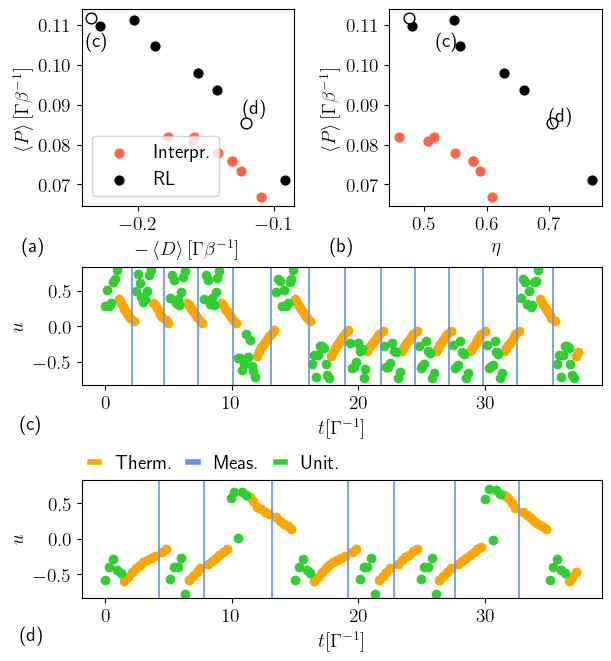

In [7]:
#info to input
main_dir = "../important_data/7_pareto_two_qubit_resonant_counterrot/data/pareto"
rl_pareto_file = os.path.join(main_dir, "det_pareto.txt")
ana_pareto_file = os.path.join(main_dir, "analytic_pareto.txt")
cycle_0_folder = os.path.join(main_dir, "2023_03_22-14_53_40_a=1.0_dt=0.15")
cycle_1_folder = os.path.join(main_dir, "2023_03_23-12_20_21_a=0.7_dt=0.3") 
selected_cycle_cvals = [1.0,0.7]
actions_to_plot_0 = 250
plot_actions_to_file_line_0 = None
plot_actions_to_file_line_1 = None

#formatting details
cycle_0_file = os.path.join(cycle_0_folder, "saved_policies/det_policy.txt")
cycle_1_file = os.path.join(cycle_1_folder, "saved_policies/det_policy.txt")
actions_line_style = "scatter"
marker_size=40
actions_0_ylim = [-0.83, 0.83]
actions_1_ylim = [-0.83, 0.83]
diss_ylim = None
eta_lim = None
pow_lim = None
prot_linewidth = 36
extra_cycles_linewidth = 1.5
custom_colors=["cornflowerblue","orange","limegreen"]
rl_legend_location = [0.72, 0.274]
rl_line_length = 1
rl_column_spacing=0.8
legend_column_spacing=0.8
action_legend_lines_1 = [Line2D([0], [0], color='orange', linewidth=4), 
                        Line2D([0], [0], color='cornflowerblue', linewidth=4),
                        Line2D([0], [0], color='limegreen', linewidth=4)]
action_legend_text_1 = ["Therm.","Meas.","Unit."]
action_legend_location_1 = [0., 1.]
legend_line_length_1 = 0.5
legend_line_length_0 = 2
vertical_line_indices = [0] #indices of discrete actions to be plotted as vertical lines

#font size
matplotlib.rcParams.update({'font.size': 14, "text.usetex": True,
                            'text.latex.preamble' : r'\usepackage{amsmath}\usepackage{physics}'})

#create the figure and subplots
fig = plt.figure(constrained_layout=True, figsize=(6,6.5))
gs = gridspec.GridSpec(3, 2, figure=fig, height_ratios = [2,1.2,1.2])
pareto_ax = fig.add_subplot(gs[0, 0])
pareto_2_ax = fig.add_subplot(gs[0, 1], sharey=pareto_ax)
prot_0_ax = fig.add_subplot(gs[1, :])
prot_1_ax = fig.add_subplot(gs[2, :], sharex=prot_0_ax)

#useful dicts to read data
quantity_ind = {'pow': 0, 'entropy': 1, 'eff':2, 'a': 3, 'h': 4}

#load pareto data
rl_data = np.loadtxt(rl_pareto_file)
ana_pareto_data = np.loadtxt(ana_pareto_file)
chosen_masks = np.full((4,) + rl_data[:,quantity_ind["a"]].shape, False)
not_chosen_mask = np.full( rl_data[:,quantity_ind["a"]].shape, False)
for i, cval in enumerate(selected_cycle_cvals):
    chosen_masks[i,:] = np.logical_or(chosen_masks[i,:], np.isclose(rl_data[:,quantity_ind["a"]], cval))
    not_chosen_mask = np.logical_or(not_chosen_mask,chosen_masks[i,:])
not_chosen_mask = np.logical_not(not_chosen_mask)

#load cycle duration data
dt_0 = float(extra.params_from_log_dir(cycle_0_folder)["dt"])
dt_1 = float(extra.params_from_log_dir(cycle_1_folder)["dt"])
actions_to_plot_1 = int(np.round(actions_to_plot_0*dt_0/dt_1))

#Pareto front (panel a)
pareto_ax.scatter(ana_pareto_data[:,quantity_ind["entropy"]], ana_pareto_data[:,quantity_ind["pow"]],
                  s=marker_size, marker="o",label="Interpr.",c="tomato",zorder=-1)
pareto_ax.scatter(rl_data[not_chosen_mask,quantity_ind["entropy"]],rl_data[not_chosen_mask,quantity_ind["pow"]],
                  s=marker_size, marker="o", label="RL",c="black")
for i in range(len(selected_cycle_cvals)):
    pareto_ax.scatter(rl_data[chosen_masks[i,:],quantity_ind["entropy"]],rl_data[chosen_masks[i,:],quantity_ind["pow"]],
                      s=marker_size*1.5, marker="o", c="white",edgecolors='black')
pareto_ax.set_xlabel(r"$-\ev*{D}[\Gamma\beta^{-1}]$")
pareto_ax.set_ylabel(r"$\ev*{P}[\Gamma\beta^{-1}]$")
pareto_ax.set_xlim(diss_ylim)
pareto_ax.set_ylim(pow_lim)
pareto_ax.legend(loc="lower left")

#Pareto front (panel b)
pareto_2_ax.scatter(ana_pareto_data[:,quantity_ind["eff"]],ana_pareto_data[:,quantity_ind["pow"]],
                 s=marker_size, marker="o", label="Interpr.",c="tomato",zorder=-1)
pareto_2_ax.scatter(rl_data[not_chosen_mask,quantity_ind["eff"]],rl_data[not_chosen_mask,quantity_ind["pow"]],
                  s=marker_size, marker="o", label="RL",c="black")
for i in range(len(selected_cycle_cvals)):
    pareto_2_ax.scatter(rl_data[chosen_masks[i,:],quantity_ind["eff"]],rl_data[chosen_masks[i,:],quantity_ind["pow"]],
                      s=marker_size*1.5, marker="o", c="white",edgecolors='black')
pareto_2_ax.set_xlabel(r"$\eta$")
pareto_2_ax.set_ylabel(r"$\ev*{P}[\Gamma\beta^{-1}]$")
pareto_2_ax.set_xlim(eta_lim)

#first protocol (panel c)
plotting.plot_actions_on_axis(cycle_0_file, prot_0_ax, actions_to_plot=actions_to_plot_0,custom_colors=custom_colors,
                                is_tri=True, k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[\Gamma^{-1}]$", 
                                legend_column_spacing=legend_column_spacing,
                                hide_gray_vertical_line=True,legend_line_length=legend_line_length_0,
                                line_style=actions_line_style, dt=dt_0, actions_ylim=actions_0_ylim,
                                plot_to_file_line=plot_actions_to_file_line_0,vertical_line_indices=vertical_line_indices)

#second protocol (panel d)
plotting.plot_actions_on_axis(cycle_1_file, prot_1_ax, actions_to_plot=actions_to_plot_1,custom_colors=custom_colors,
                                is_tri=True, k_notation=False, x_count_from_zero=True,
                                linewidth = prot_linewidth, xlabel="$t[\Gamma^{-1}]$", legend_lines=action_legend_lines_1,
                                legend_text=action_legend_text_1, legend_location=action_legend_location_1,
                                hide_gray_vertical_line=True,legend_line_length=legend_line_length_1,
                                line_style=actions_line_style, legend_column_spacing=legend_column_spacing, dt=dt_1,
                                 actions_ylim=actions_1_ylim,plot_to_file_line=plot_actions_to_file_line_1,
                                 vertical_line_indices=vertical_line_indices)

#panel numbering labels
fig.text(-0.28,-0.23, r"(a)",transform=pareto_ax.transAxes)
fig.text(-0.28,-0.23, r"(b)",transform=pareto_2_ax.transAxes)
fig.text(-0.118,-0.37, r"(c)",transform=prot_0_ax.transAxes)
fig.text(-0.118,-0.36, r"(d)",transform=prot_1_ax.transAxes)

#extra labels in panels (a) and (b)
fig.text(0.02 ,0.81, r"(c)",transform=pareto_ax.transAxes)
fig.text(0.76, 0.47, r"(d)",transform=pareto_ax.transAxes)
fig.text(0.22, 0.81, r"(c)",transform=pareto_2_ax.transAxes)
fig.text(0.75, 0.43, r"(d)",transform=pareto_2_ax.transAxes)


#save figure
plt.savefig("fig15.pdf")
#show
plt.show()

# Fig 16

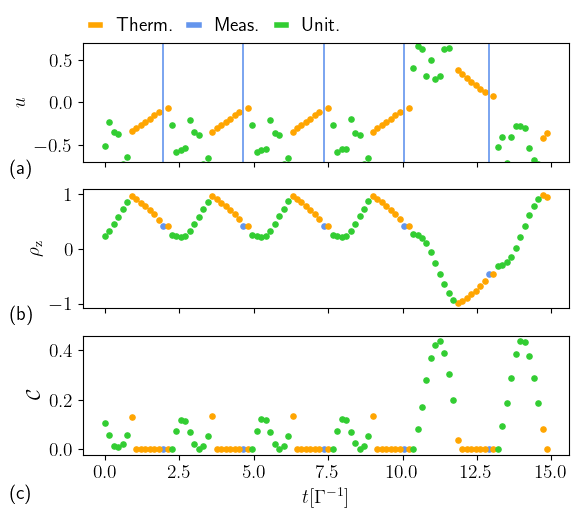

In [3]:
reload(plotting);

#info to input
counter = True
max_pow = True

#load the proper folders and cycles
if counter:
    main_dir = "../important_data/7_pareto_two_qubit_resonant_counterrot/data/pareto"
    if max_pow:
        cycle_folder = os.path.join(main_dir, "2023_03_22-14_53_40_a=1.0_dt=0.15")
    else:
        cycle_folder = os.path.join(main_dir, "2023_03_23-12_20_21_a=0.7_dt=0.3") 
#not counter rotating
else:
    main_dir = "../important_data/6_pareto_two_qubit_resonant/data/pareto"
    if max_pow:
        cycle_folder = os.path.join(main_dir, "2023_03_17-16_33_04_a=1.0")
    else:
        cycle_folder = os.path.join(main_dir, "2023_03_17-17_18_38_a=0.7") 

#extra formatting
actions_to_plot = 100
plot_to_file_line = None

#formatting details
cycle_file = os.path.join(cycle_folder, "saved_policies/det_policy.txt")
states_file = os.path.join(cycle_folder, "saved_policies/states.txt")
actions_line_style = "scatter"
actions_ylim = [-0.7, 0.7]
marker_size = 14
custom_colors=["cornflowerblue","orange","limegreen"]
action_legend_lines = [Line2D([0], [0], color='orange', linewidth=4), 
                        Line2D([0], [0], color='cornflowerblue', linewidth=4),
                        Line2D([0], [0], color='limegreen', linewidth=4)]
action_legend_text = ["Therm.","Meas.","Unit."]
action_legend_location = [0., 1.]
legend_line_length = 0.5
legend_column_spacing=0.8
vertical_line_indices = [0] #indices of discrete actions to be plotted as vertical lines

#font size
matplotlib.rcParams.update({'font.size': 14, "text.usetex": True,
                            'text.latex.preamble' : r'\usepackage{amsmath}\usepackage{physics}'})

#create the figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(6, 5.4), sharex=True)


#load cycle duration data
dt = float(extra.params_from_log_dir(cycle_folder)["dt"])

#plot the protocol
plotting.plot_actions_on_axis(cycle_file, axes[0], actions_to_plot=actions_to_plot,custom_colors=custom_colors,
                                is_tri=True, k_notation=False, x_count_from_zero=True, linewidth = marker_size,
                                xlabel="$t[\Gamma^{-1}]$", hide_gray_vertical_line=True, line_style=actions_line_style,
                                dt=dt, actions_ylim=actions_ylim, plot_to_file_line=plot_to_file_line,
                                hide_xaxis_label=True, legend_lines=action_legend_lines,
                                vertical_line_indices=vertical_line_indices,
                                legend_text=action_legend_text, legend_location=action_legend_location,
                                legend_line_length=legend_line_length, legend_column_spacing=legend_column_spacing)

#plot the state
plotting.plot_bloch_component_on_axis(cycle_folder, states_file, cycle_file, 2, axes[1], values_to_plot=actions_to_plot, 
                                k_notation=False, x_count_from_zero=True, xlabel="$t[\Gamma^{-1}]$", dt=dt, ylim=None,
                                plot_to_file_line=plot_to_file_line, ylabel=r"$\rho_{\rm z}$", hide_xaxis_label=True,
                                     custom_colors=custom_colors,marker_size=marker_size)
#plot the concurrence
plotting.plot_concurrence_on_axis(cycle_folder, states_file, cycle_file, axes[2], values_to_plot=actions_to_plot, 
                                k_notation=False, x_count_from_zero=True, xlabel="$t[\Gamma^{-1}]$", dt=dt, ylim=None,
                                plot_to_file_line=plot_to_file_line,custom_colors=custom_colors,marker_size=marker_size)


#panel numbering labels
fig.text(-0.15,-0.1, r"(a)",transform=axes[0].transAxes)
fig.text(-0.15,-0.1, r"(b)",transform=axes[1].transAxes)
fig.text(-0.15,-0.37, r"(c)",transform=axes[2].transAxes)

#tight layout
plt.tight_layout()

#save figure
plt.savefig("fig16.pdf")
#show
plt.show()